# Carga un dataset de la libreria `pydataset` 

Puedes elegir la que más te guste! 

Hint: ten en cuenta que os pediremos que hagais algunas transformaciones usando `apply` y `groupby`! 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt


# Explora el dataset elegido 

- Cuantas columnas tenemos
- Cuantos nulos
- Haz una descripción
- ¿Puedes homogeneizar el nombre de las columnas?

Tómate tu tiempo para entender el dataframe y la información que hay en el. Y escribe brevemente las conclusiones principales de el dataset elegido. 

**No te olvides de guardar tu nuevo csv limpio**

In [2]:
df_covid_uk = pd.read_csv('data/region_2022-02-03.csv')

# datos obtenidos de https://coronavirus.data.gov.uk/details/download

In [3]:
def describing_df(df,name):
    
    print(f"\n\n DESCRIPCION DEL DATA FRAME: {name}",'\n\n--- Pequeña muestra de datos del data frame ---',)
    display(df.sample(5))
    
    print('--- Descripcion de los principales estadisticos del data frame por columnas ---\n\n',
          df.describe(percentiles=[]).T, )
    
    print('\n\n--- Tipologia de datos del data frame ---\n\n',
          df.dtypes,)
    
    print('\n\n--- Porcentaje de nulos en cada uno de los campos ---',)
    df_null_perc = (df.isnull().sum() * 100) / df.shape[0]
    display(df_null_perc)
    
    
    print(f'\n\n--- El Data Frame {name} tiene {df.shape[0]} columna/s y {df.shape[1]} fila/s---',)
    

    

In [4]:
describing_df(df_covid_uk,'Covid Data from UK')



 DESCRIPCION DEL DATA FRAME: Covid Data from UK 

--- Pequeña muestra de datos del data frame ---


,areaCode,areaName,areaType,date,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
3625,E12000006,East of England,region,2021-03-10,375803,13196.0,NaN,NaN,NaN
3056,E12000005,West Midlands,region,2020-12-10,179456,6860.0,NaN,NaN,NaN
5582,E12000009,South West,region,2021-03-30,218161,6762.0,NaN,NaN,NaN
380,E12000001,North East,region,2021-01-19,152113,4682.0,NaN,NaN,NaN
3716,E12000006,East of England,region,2020-12-09,97789,5152.0,NaN,NaN,NaN


--- Descripcion de los principales estadisticos del data frame por columnas ---

                                                  count          mean  \
cumCasesByPublishDate                           5931.0  4.198607e+05   
cumDeaths28DaysByPublishDate                    4821.0  1.061560e+04   
cumPeopleVaccinatedFirstDoseByPublishDate          9.0  4.793661e+06   
cumPeopleVaccinatedSecondDoseByPublishDate         9.0  4.466490e+06   
cumPeopleVaccinatedThirdInjectionByPublishDate     9.0  3.451755e+06   

                                                         std        min  \
cumCasesByPublishDate                           4.281132e+05     3913.0   
cumDeaths28DaysByPublishDate                    5.128239e+03     1876.0   
cumPeopleVaccinatedFirstDoseByPublishDate       1.517759e+06  2076170.0   
cumPeopleVaccinatedSecondDoseByPublishDate      1.405884e+06  1938974.0   
cumPeopleVaccinatedThirdInjectionByPublishDate  1.079398e+06  1517243.0   

                                  

areaCode                                           0.000000
areaName                                           0.000000
areaType                                           0.000000
date                                               0.000000
cumCasesByPublishDate                              0.000000
cumDeaths28DaysByPublishDate                      18.715225
cumPeopleVaccinatedFirstDoseByPublishDate         99.848255
cumPeopleVaccinatedSecondDoseByPublishDate        99.848255
cumPeopleVaccinatedThirdInjectionByPublishDate    99.848255
dtype: float64



--- El Data Frame Covid Data from UK tiene 5931 columna/s y 9 fila/s---


# Crea alguna función y aplícala a tu dataframe usando `apply`

In [5]:
def str2dt(string_):
    from datetime import datetime
    return datetime.strptime(string_, '%Y-%m-%d')

def ym2num(n):
    n = str(n)
    n = int(n[:4]+n[5:])
    
    return n


In [6]:


#reemplazo los nan por 0, tengo la casuistica de que sea una string, aplicando padnas y numpy
df_covid_uk.fillna(0).replace('NaN',0).replace(np.nan, 0)

#calculo el año-mes tanto numerico como en fecha
df_covid_uk['date_f'] = df_covid_uk['date'].apply(str2dt)
df_covid_uk['month_year'] = df_covid_uk['date_f'].dt.to_period('M')
df_covid_uk['month_year_num'] = df_covid_uk['month_year'].apply(ym2num)



# Aplica el conocimiento del groupby en tu dataframe y saca algunas conclusiones (practica el *story telling*)

**BONUS** Plotea algunas de las conclusiones que hayas podido extraer

In [7]:
# dropeo las columnas que no me interesan para el group by
df_covid_uk = df_covid_uk.drop(['areaCode','areaType','date','date_f'], axis = 1)


In [8]:
#hago un group by por el maximo para coger el acumulado de todo el mes
df_covid_uk_month = df_covid_uk.groupby(["areaName", "month_year","month_year_num"]).max()

# reseteo indices
df_covid_uk_month.reset_index(["areaName", "month_year","month_year_num"], inplace = True)


In [19]:
# calculo el actual para cada mes para ello hare un DF nuevo con el mes desplazado, hare un
# join y restare el mes anterior.

def sbtr_month(ym):
    ym_str = str(ym)
    month_str = ym_str[4:]
    year_str = ym_str[:4]
    month = int(month_str)
    year = int(year_str)
    
    if month == 1:
        ym_1 = int(str(year-1)+'12')
    else: 
        ym_1 = int(year_str+ ('0'+str(month-1))[-2:]  )
        
    return ym_1
    
df_covid_uk_month_1 = df_covid_uk_month

df_covid_uk_month_1['month_year_num_1'] = df_covid_uk_month_1['month_year_num'].apply(sbtr_month)

# ahora limpio el segundo data frame para quedearme solo con lo que me interesa
field2drop = ['month_year','cumPeopleVaccinatedSecondDoseByPublishDate',
              'cumPeopleVaccinatedThirdInjectionByPublishDate']
df_covid_uk_month_1 = df_covid_uk_month_1.drop(field2drop, axis = 1)

#renombro las columnas para poder tratarlas posteriormente con mayor facilidad
renaming = {"cumCasesByPublishDate": "cumCasesByPublishDate_1","cumDeaths28DaysByPublishDate": "cumDeaths28DaysByPublishDate_1",
           "cumPeopleVaccinatedFirstDoseByPublishDate": "cumPeopleVaccinatedFirstDoseByPublishDate_1","areaName": "areaName_1",
           "month_year_num":"month_year_num_actual"}
df_covid_uk_month_1.rename(columns = renaming, inplace = True)

# hago un inner join para cruzar la informacion
df_covid_uk_month_merged = pd.merge(df_covid_uk_month, df_covid_uk_month_1,  how='inner', left_on=['areaName','month_year_num'], right_on = ['areaName_1','month_year_num_1'])



In [10]:
display(df_covid_uk_month_merged.sample(5))

,areaName,month_year,month_year_num,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate,month_year_num_1_x,areaName_1,month_year_num_actual,cumCasesByPublishDate_1,cumDeaths28DaysByPublishDate_1,cumPeopleVaccinatedFirstDoseByPublishDate_1,month_year_num_1_y
159,West Midlands,2020-09,202009,42638,4637.0,NaN,NaN,NaN,202008,West Midlands,202010,88879,4974.0,NaN,202009
92,North West,2020-08,202008,53377,6159.0,NaN,NaN,NaN,202007,North West,202009,84650,6344.0,NaN,202008
71,North East,2020-09,202009,25690,2184.0,NaN,NaN,NaN,202008,North East,202010,60888,2610.0,NaN,202009
172,West Midlands,2021-10,202110,842438,14750.0,NaN,NaN,NaN,202109,West Midlands,202111,939304,15148.0,NaN,202110
101,North West,2021-05,202105,622597,17924.0,NaN,NaN,NaN,202104,North West,202106,697186,18061.0,NaN,202105


In [21]:
# ahora puedo calcular los actuals para los casos, las muertes y los vacunados
# la formula generica sera: metericaActual = metricaAcumulada_1 - metricaAcumulada

# calcularemos tres metricas nuevas: ActCasesByPublishDate, ActDeaths28DaysByPublishDate y ActPeopleVaccinatedFirstDoseByPublishDate

df_covid_uk_month_merged["ActCasesByPublishDate"] = df_covid_uk_month_merged["cumCasesByPublishDate_1"] - df_covid_uk_month_merged["cumCasesByPublishDate"] 
df_covid_uk_month_merged["ActDeaths28DaysByPublishDate"] = df_covid_uk_month_merged["cumDeaths28DaysByPublishDate_1"] - df_covid_uk_month_merged["cumDeaths28DaysByPublishDate"] 
df_covid_uk_month_merged["ActPeopleVaccinatedFirstDoseByPublishDate"] = df_covid_uk_month_merged["cumPeopleVaccinatedFirstDoseByPublishDate_1"] - df_covid_uk_month_merged["cumPeopleVaccinatedFirstDoseByPublishDate"] 


#dropeo las columnas que no son interesantes para el analisis
field2drop = ['cumCasesByPublishDate_1','cumDeaths28DaysByPublishDate_1',
              'cumPeopleVaccinatedFirstDoseByPublishDate_1','month_year_num_1_y',
             'month_year','month_year_num','cumCasesByPublishDate','cumDeaths28DaysByPublishDate',
              'cumPeopleVaccinatedFirstDoseByPublishDate','cumPeopleVaccinatedSecondDoseByPublishDate',
              'cumPeopleVaccinatedThirdInjectionByPublishDate','month_year_num_1_x','areaName_1']

df_covid_uk_month_merged = df_covid_uk_month_merged.drop(field2drop, axis = 1)

display(df_covid_uk_month_merged.sample(5))


,areaName,month_year_num_actual,ActCasesByPublishDate,ActDeaths28DaysByPublishDate,ActPeopleVaccinatedFirstDoseByPublishDate
84,North East,202111,44864,233.0,NaN
77,North East,202104,2861,24.0,NaN
145,South West,202106,18993,0.0,NaN
143,South West,202104,2739,47.0,NaN
171,West Midlands,202110,114773,345.0,NaN


<AxesSubplot:xlabel='month_year_num_actual', ylabel='ActCasesByPublishDate'>

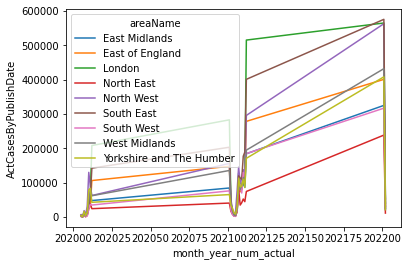

In [22]:
import seaborn as sns

sns.lineplot(data=df_covid_uk_month_merged
             , x="month_year_num_actual", y="ActCasesByPublishDate"
             , hue="areaName")

<AxesSubplot:xlabel='month_year_num_actual', ylabel='ActCasesByPublishDate'>

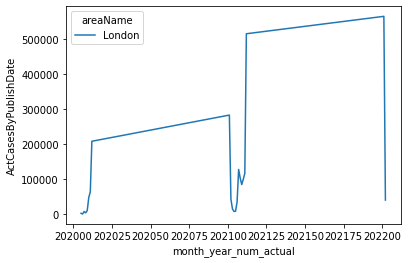

In [23]:
sns.lineplot(data=df_covid_uk_month_merged[df_covid_uk_month_merged["areaName"] == 'London']
             , x="month_year_num_actual", y="ActCasesByPublishDate"
             , hue="areaName")

<AxesSubplot:xlabel='month_year_num_actual', ylabel='ActDeaths28DaysByPublishDate'>

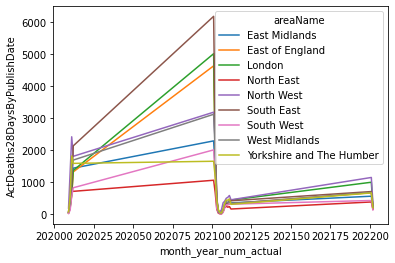

In [25]:
sns.lineplot(data=df_covid_uk_month_merged
             , x="month_year_num_actual", y="ActDeaths28DaysByPublishDate"
             , hue="areaName")

<AxesSubplot:xlabel='month_year_num_actual', ylabel='ActDeaths28DaysByPublishDate'>

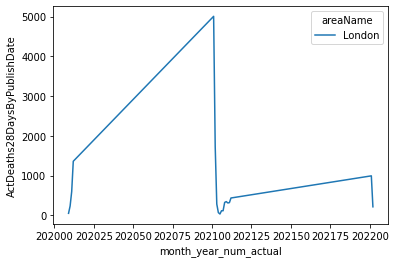

In [26]:
sns.lineplot(data=df_covid_uk_month_merged[df_covid_uk_month_merged["areaName"] == 'London']
             , x="month_year_num_actual", y="ActDeaths28DaysByPublishDate"
             , hue="areaName")